### Homework

Create a new convolutional module and implement it by deriving it from nn.Module.
Then, use it in a neural network and test it in CIFAR10.

Your creativity and the documentation are your best friends ;)
Remember that a a layer is just a function transforming a tensor. So, I am asking you to think of
transformation $f: \mathcal{R}^{b \times c_1 \times l_1 \times l_1} \rightarrow \mathcal{R}^{b \times c_2 \times l_2 \times l_2}$.

Don't be scared by all those superscripts. During the training, you are dealing with minibatches of images, which are
just 4-order arrays:
- the first dimension is the batch axis, and $b$ is the batch size;
- the second dimension indicates the number of channels of your filters, $c$;
- the third and fourth dimensions indicates the height and width of the input and output filters.
They are typically the same, since we deal with square $l\times l$ filters, but in general they could be different.

Notice that in our bottleneck layer we had $l_1 = l_2$ and $c_1 = c_2$.
The bottleneck transformation preserves the tensor dimension.

Have fun, and for now, do not worry to much about getting super performance. As usual, for any question or advise you
can reach me by email.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/deep-learning-with-pytorch

/content/drive/My Drive/Colab Notebooks/deep-learning-with-pytorch


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [0]:
# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
                                ])

In [7]:
#CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [0]:
def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

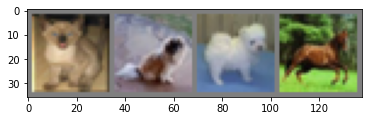

In [10]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

#show images
imshow(torchvision.utils.make_grid(images))

In [0]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    # input size: (n, 3, 32, 32)
    x = self.pool(F.relu(self.conv1(x)))  #-> n, 6, 14, 14
    x = self.pool(F.relu(self.conv2(x)))  #-> n, 16, 5, 5
    x = x.view(-1, 16 * 5 * 5)            #-> n, 400
    x = F.relu(self.fc1(x))               #-> n, 120
    x = F.relu(self.fc2(x))               #-> n, 84
    x = F.relu(self.fc3(x))               #-> n, 10
    return x   


In [12]:
# model
model = ConvNet().to(device)

#loss
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)
    # forward pass
    outputs = model(images)
    # evaluation of loss
    loss = criterion(outputs, labels)
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 2000 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')

Epoch [1/5], Step [2000/12500], Loss: 2.2795
Epoch [1/5], Step [4000/12500], Loss: 2.2971
Epoch [1/5], Step [6000/12500], Loss: 2.3000
Epoch [1/5], Step [8000/12500], Loss: 2.2990
Epoch [1/5], Step [10000/12500], Loss: 2.3030
Epoch [1/5], Step [12000/12500], Loss: 2.3119
Epoch [2/5], Step [2000/12500], Loss: 2.2729
Epoch [2/5], Step [4000/12500], Loss: 2.3058
Epoch [2/5], Step [6000/12500], Loss: 2.2839
Epoch [2/5], Step [8000/12500], Loss: 2.1479
Epoch [2/5], Step [10000/12500], Loss: 1.9694
Epoch [2/5], Step [12000/12500], Loss: 2.2622
Epoch [3/5], Step [2000/12500], Loss: 1.4105
Epoch [3/5], Step [4000/12500], Loss: 2.6483
Epoch [3/5], Step [6000/12500], Loss: 1.4165
Epoch [3/5], Step [8000/12500], Loss: 2.0912
Epoch [3/5], Step [10000/12500], Loss: 1.8553
Epoch [3/5], Step [12000/12500], Loss: 2.1297
Epoch [4/5], Step [2000/12500], Loss: 2.2636
Epoch [4/5], Step [4000/12500], Loss: 1.4070
Epoch [4/5], Step [6000/12500], Loss: 1.4624
Epoch [4/5], Step [8000/12500], Loss: 1.7659
Epoc

In [13]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 44.23 %
Accuracy of plane: 53.1 %
Accuracy of car: 71.7 %
Accuracy of bird: 29.6 %
Accuracy of cat: 23.5 %
Accuracy of deer: 33.0 %
Accuracy of dog: 45.8 %
Accuracy of frog: 67.3 %
Accuracy of horse: 59.6 %
Accuracy of ship: 58.7 %
Accuracy of truck: 0.0 %
